In [112]:
import pandas as pd
import numpy as np
data = pd.read_csv('usa_housing_price.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Area Population,size,Price
0,79545.45857,5.317139,7.009188,23086.80050,188.214212,1.059034e+06
1,79248.64245,4.997100,6.730821,40173.07217,160.042526,1.505891e+06
2,61287.06718,5.134110,8.512727,36882.15940,227.273545,1.058988e+06
3,63345.24005,3.811764,5.586729,34310.24283,164.816630,1.260617e+06
4,59982.19723,5.959445,7.839388,26354.10947,161.966659,6.309435e+05


In [114]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(10,10))
fig1 =plt.subplot(231)
plt.scatter(data.loc[:,'Avg. Area Income'],data.loc[:,'Price'])
plt.title('Price VS Income')

Text(0.5, 1.0, 'Price VS Income')

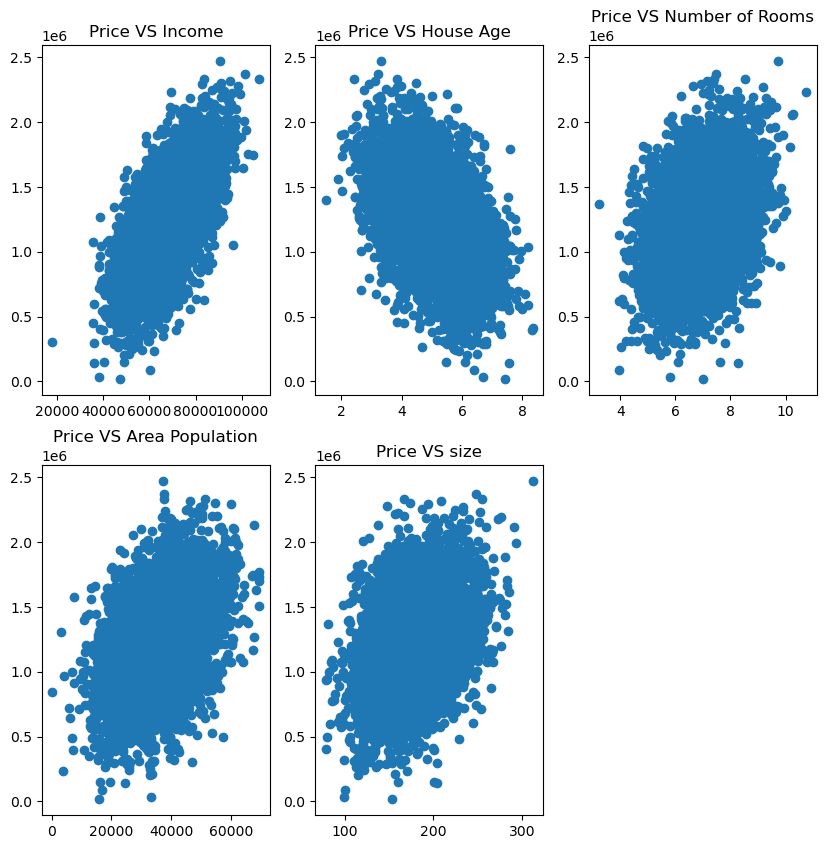

In [116]:
fig2 =plt.subplot(232)
plt.scatter(data.loc[:,'Avg. Area House Age'],data.loc[:,'Price'])
plt.title('Price VS House Age')

fig3 =plt.subplot(233)
plt.scatter(data.loc[:,'Avg. Area Number of Rooms'],data.loc[:,'Price'])
plt.title('Price VS Number of Rooms')

fig4 =plt.subplot(234)
plt.scatter(data.loc[:,'Area Population'],data.loc[:,'Price'])
plt.title('Price VS Area Population')

fig5 =plt.subplot(235)
plt.scatter(data.loc[:,'size'],data.loc[:,'Price'])
plt.title('Price VS size')
plt.show()

In [118]:
X = data.loc[:,'size']
y = data.loc[:,'Price']
y.head()

# 转换维度
X = np.array(X).reshape(-1,1)
print(X.shape)


#线性回归模型
from sklearn.linear_model import LinearRegression
LR1 = LinearRegression()
#训练模型
LR1.fit(X,y)

(5000, 1)


LinearRegression()

In [120]:
y_predict_1 = LR1.predict(X)
print(y_predict_1)


[1276881.85636623 1173363.58767144 1420407.32457443 ... 1097848.86467426
 1264502.88144558 1131278.58816273]


In [122]:
from sklearn.metrics import mean_squared_error,r2_score
mean_squared_error_1 = mean_squared_error(y,y_predict_1)
r2_score_1 = r2_score(y,y_predict_1)
print(mean_squared_error_1,r2_score_1)

108771672553.6264 0.1275031240418234


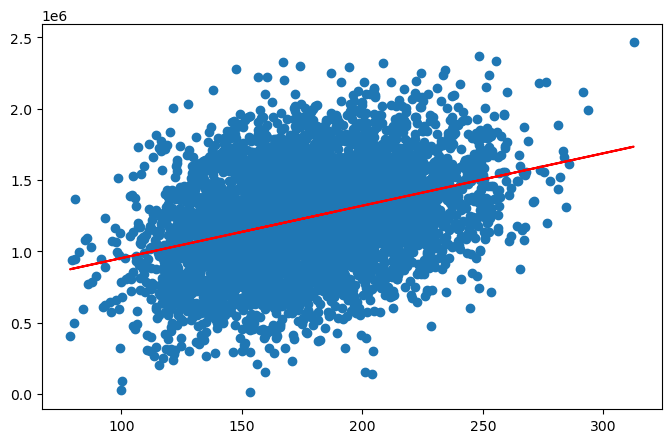

In [124]:
fig6 = plt.figure(figsize=(8,5))
plt.scatter(X,y)
plt.plot(X,y_predict_1,'r')
plt.show()

[1223968.89166039 1497306.33188643 1250884.31019441 ... 1020693.92390366
 1260503.36914608 1302737.79157666]
10219846512.177862 0.9180229195220739
108771672553.6264


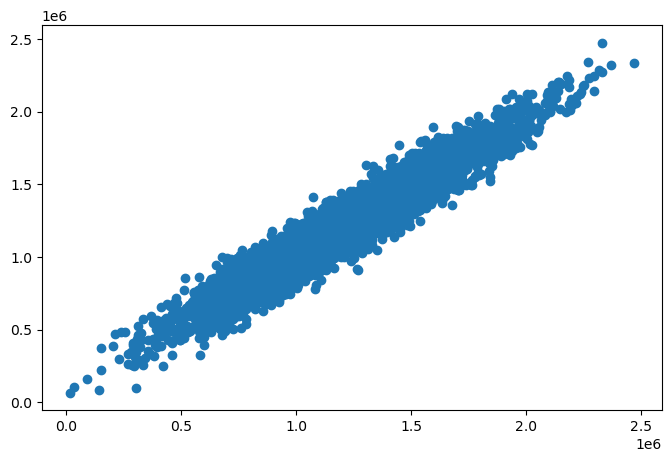

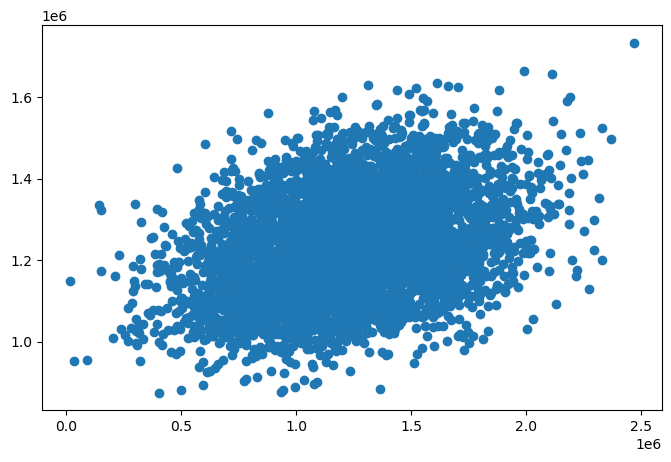

In [126]:
X_multi = data.drop(['Price'],axis=1)
X_multi

#第二个线性模型
LR_multi = LinearRegression()
#train the model
LR_multi.fit(X_multi,y)

#多因子预测
y_predict_multi = LR_multi.predict(X_multi)
print(y_predict_multi)

mean_squared_error_multi = mean_squared_error(y,y_predict_multi)
r2_score_multi = r2_score(y,y_predict_multi)
print(mean_squared_error_multi,r2_score_multi)

print(mean_squared_error_1)

fig7 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_multi)
plt.show()

fig8 = plt.figure(figsize=(8,5))
plt.scatter(y,y_predict_1)
plt.show()

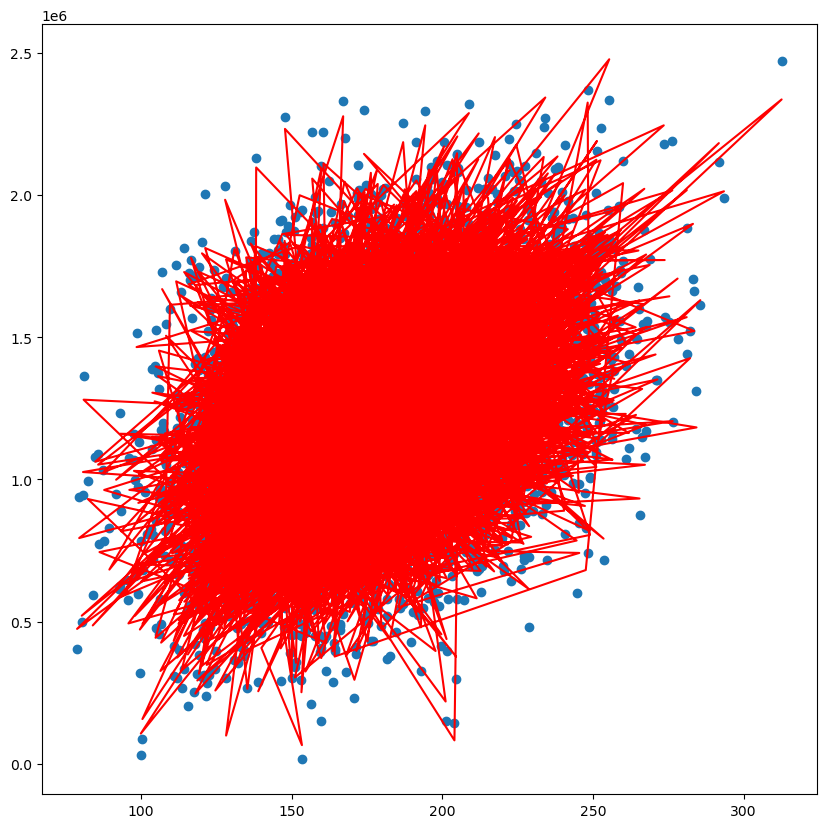

In [139]:
fig9 = plt.figure(figsize=(10,10))
plt.scatter(X,y)
plt.plot(X,y_predict_multi,'r')
plt.show()

In [141]:
X_test = [65000,5,5,30000,200]
X_test = np.array(X_test).reshape(1,-1)
print(X_test)

y_test_predict = LR_multi.predict(X_test)
print(y_test_predict)

[[65000     5     5 30000   200]]
[817052.19516277]


/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
